In [1]:
# Import Packages
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
from statsmodels.tools.eval_measures import rmse

In [2]:
# Read in shark data
eat = pd.read_excel("SharkData.xlsx", sheet_name = 0)
targets = pd.read_excel("SharkData.xlsx", sheet_name = 1)
drops = pd.read_excel("SharkData.xlsx", sheet_name = 2)
other_factors = pd.read_excel("SharkData.xlsx", sheet_name = 3)

# Data Cleaning

In [3]:
# Clean eating dataset
eat = eat.iloc[1:,:-1]
eat.rename(columns = {"Unnamed: 14":'Etc. Comments', "Pieces Eaten": "Date", 'Total: ' : 'Total'}, inplace = True)

#get rid of null values at end of dataset
eat = eat.head(582)

# Change date to just date format, not datetime
eat['Date'] = pd.to_datetime(eat['Date']).dt.date



eat.reset_index(drop=True,inplace = True)
eat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total,Etc. Comments
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,2.0,3.0,1.0,33.0,NaN
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,3.0,1.0,0.0,6.0,NaN
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,14.0,NaN
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,3.0,2.0,0.0,27.0,NaN


In [4]:
# Clean Drops Dataset
drops = drops.iloc[1:,:-1]
drops['Drops'] = pd.to_datetime(drops['Drops']).dt.date
drops.rename(columns = {"Drops" : "Date", "Total: ":"Total"}, inplace = True)
drops.reset_index(drop=True,inplace = True)
drops.tail()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total
577,2020-09-22,0.0,0.0,1.0,4.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,10.0
578,2020-09-24,0.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0
579,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
580,2020-09-27,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0
581,2020-09-29,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0


In [5]:
# Clean Targets Dataset
targets = targets.iloc[1:,:-1]
targets.rename(columns = {"Unnamed: 14":'Etc. Comments', "Targets": "Date", "Total: ": "Total"}, inplace = True)

#get rid of null values at end of dataset
targets = targets.head(582)

# Change date to just date format, not datetime
targets['Date'] = pd.to_datetime(targets['Date']).dt.date

targets.reset_index(drop=True,inplace = True)
targets.tail()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,GR3,GR4,GR5,Total
577,2020-09-22,6.0,1.0,4.0,6.0,5.0,4.0,7.0,2.0,1.0,5.0,4.0,1.0,46.0
578,2020-09-24,8.0,18.0,2.0,9.0,10.0,10.0,11.0,5.0,6.0,3.0,7.0,9.0,98.0
579,2020-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,3.0,5.0,8.0,24.0
580,2020-09-27,10.0,19.0,9.0,10.0,8.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,75.0
581,2020-09-29,15.0,5.0,6.0,6.0,4.0,4.0,7.0,4.0,1.0,4.0,4.0,1.0,61.0


# Other Factors Data Cleaning and Dummy Variable Creation for Foods


In [6]:
dummy_factors = other_factors[['Saury', 'Blue Runner',
                'Squid', 'Mackerel', 'Herring', 'Sardine',
                'Mazuri Vitamins', 'Garlic', 'Salmon', 'Bonito', 'Bluefish', 'Mahi',
                    'Goggle Eye', 'Humbolt Squid']]

for i in dummy_factors:
    dummy_factors[i] = dummy_factors[i].fillna(0)
dummy_factors.rename(columns = {"Blue Runner": "Blue_Runner", "Mazuri Vitamins": "Mazuri_Vitamins", 
                               "Goggle Eye": "Goggle_Eye", "Humbolt Squid": "Humbolt_Squid"}, inplace = True)

/home/stats/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/stats/.local/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Combine Datasets to get all factors to perform regression on

In [7]:
# combine eat data
eat_concat1 = pd.concat([eat,dummy_factors], axis = 1)
eat_concat = pd.concat([eat_concat1, other_factors["Temperature"]], axis = 1)
eat_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Sardine,Mazuri_Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.4


In [8]:
# Add eat variable for Covid shut down
start_date = pd.to_datetime('03-14-2020')
end_date = pd.to_datetime('05-09-2020')
conditions = [ (eat_concat['Date'] >= start_date) & (eat_concat['Date'] <= end_date),
              (eat_concat['Date'] < start_date) | (eat_concat['Date'] > end_date)]
values = [1, 0]
eat_concat["covid"] = np.select(conditions, values)

In [9]:
# Add eat variable for light training
light_start = pd.to_datetime('02-15-2018')
conditions_light = [ (eat_concat['Date'] >= light_start), (eat_concat['Date'] < light_start)]
values_light = [1, 0]
eat_concat["light_training"] = np.select(conditions_light, values_light)

In [10]:
# combine drops data
drops_concat1 = pd.concat([drops,dummy_factors], axis = 1)
drops_concat = pd.concat([drops_concat1, other_factors["Temperature"]], axis = 1)
drops_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Sardine,Mazuri_Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature
0,2017-12-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
1,2017-12-07,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
3,2017-12-10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
4,2017-12-12,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.4


In [11]:
# Add drop variable for Covid shut down
start_date = pd.to_datetime('03-14-2020')
end_date = pd.to_datetime('05-09-2020')
conditions = [ (drops_concat['Date'] >= start_date) & (drops_concat['Date'] <= end_date),
              (drops_concat['Date'] < start_date) | (drops_concat['Date'] > end_date)]
values = [1, 0]
drops_concat["covid"] = np.select(conditions, values)

In [12]:
# Add drop variable for light training
light_start = pd.to_datetime('02-15-2018')
conditions_light = [ (drops_concat['Date'] >= light_start), (drops_concat['Date'] < light_start)]
values_light = [1, 0]
drops_concat["light_training"] = np.select(conditions_light, values_light)

In [13]:
# combine Target data
targets_concat1 = pd.concat([targets,dummy_factors], axis = 1)
targets_concat = pd.concat([targets_concat1, other_factors["Temperature"]], axis = 1)
targets_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Sardine,Mazuri_Vitamins,Garlic,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature
0,2017-12-05,3.0,0.0,4.0,3.0,0.0,2.0,2.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
1,2017-12-07,4.0,5.0,2.0,2.0,5.0,3.0,5.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.2
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
3,2017-12-10,4.0,7.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.6
4,2017-12-12,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,73.4


In [14]:
# Add target variable for Covid shut down
start_date = pd.to_datetime('03-14-2020')
end_date = pd.to_datetime('05-09-2020')
conditions = [ (targets_concat['Date'] >= start_date) & (targets_concat['Date'] <= end_date),
              (targets_concat['Date'] < start_date) | (targets_concat['Date'] > end_date)]
values = [1, 0]
targets_concat["covid"] = np.select(conditions, values)

In [15]:
# Add target variable for light training
light_start = pd.to_datetime('02-15-2018')
conditions_light = [ (targets_concat['Date'] >= light_start), (targets_concat['Date'] < light_start)]
values_light = [1, 0]
targets_concat["light_training"] = np.select(conditions_light, values_light)

In [16]:
# Add group feed variable to eat, drop, and target datasets
GroupFeed = []
for row in drops.index:
    if drops.iloc[row,:].isna().sum() > 0:
        GroupFeed.append(0)
    else:
        GroupFeed.append(1)
GroupFeed

eat_concat["GroupFeed"] = GroupFeed
drops_concat["GroupFeed"] = GroupFeed
targets_concat["GroupFeed"] = GroupFeed
targets_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,Salmon,Bonito,Bluefish,Mahi,Goggle_Eye,Humbolt_Squid,Temperature,covid,light_training,GroupFeed
0,2017-12-05,3.0,0.0,4.0,3.0,0.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.2,0,0,1
1,2017-12-07,4.0,5.0,2.0,2.0,5.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.2,0,0,1
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.6,0,0,0
3,2017-12-10,4.0,7.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,73.6,0,0,0
4,2017-12-12,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,73.4,0,0,1


In [17]:
# add column to dataset that indicates whether targets were being varied or not
varied_start1 = pd.to_datetime('04-01-2018')
varied_stop = pd.to_datetime('05-12-2018')
varied_start2 = pd.to_datetime('07-26-2018')

eat_concat["Varied_Target"] = [1 if (varied_start1 <= ele <= varied_stop) | (ele >= varied_start2)  else 0 for ele in eat_concat["Date"]]
drops_concat["Varied_Target"] = [1 if (varied_start1 <= ele <= varied_stop) | (ele >= varied_start2)  else 0 for ele in drops_concat["Date"]]
targets_concat["Varied_Target"] = [1 if (varied_start1 <= ele <= varied_stop) | (ele >= varied_start2)  else 0 for ele in targets_concat["Date"]]

# Subset Creation

In [18]:

# All SS Subset
All_SS = eat_concat[['Ross', 'Chandler']]

# All BT Subset
All_BT = eat_concat[['BT1', 'BT2', 'BT3', 'BT4', 'BT5']]

# All GR Subset
All_GR = eat_concat[['GR1', 'GR2', 'GR3', 'GR4', 'GR5']]

# Male Subset
Male = eat_concat[["BT1","BT5","GR1","Ross","Chandler"]]

# Female Subset
female = eat_concat[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]]

# Append all subsets to original datasets
# eat dataset
eat_concat["All_GR"] = eat['GR1'] + eat['GR2'] + eat['GR3'] + eat['GR4'] + eat['GR5']
eat_concat["All_BT"] = eat['BT1'] + eat['BT2'] + eat['BT3'] + eat['BT4'] + eat['BT5']
eat_concat["All_SS"] = eat['Ross'] + eat['Chandler']
eat_concat["male"] = eat[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
eat_concat["female"] = eat[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)

# drop dataset
drops_concat["All_GR"] = drops['GR1'] + drops['GR2'] + drops['GR3'] + drops['GR4'] + drops['GR5']
drops_concat["All_BT"] = drops['BT1'] + drops['BT2'] + drops['BT3'] + drops['BT4'] + drops['BT5']
drops_concat["All_SS"] = drops['Ross'] + drops['Chandler']
drops_concat["male"] = drops[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
drops_concat["female"] = drops[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)

# target dataset
targets_concat["All_GR"] = targets['GR1'] + targets['GR2'] + targets['GR3'] + targets['GR4'] + targets['GR5']
targets_concat["All_BT"] = targets['BT1'] + targets['BT2'] + targets['BT3'] + targets['BT4'] + targets['BT5']
targets_concat["All_SS"] = targets['Ross'] + targets['Chandler']
targets_concat["male"] = targets[["BT1","BT5","GR1","Ross","Chandler"]].sum(axis = 1)
targets_concat["female"] = targets[["BT2","BT3","BT4","GR2","GR3","GR4","GR5"]].sum(axis = 1)


# Create Tables for Poisson Regression Time Series For Pieces Eaten For All Sharks

In [19]:
# create additional time variables for eating
eat_concat['Date'] = pd.to_datetime(eat_concat['Date'])
eat_concat['Day_of_week'] = pd.to_datetime(eat_concat['Date']).dt.dayofweek
eat_concat['Month'] = pd.to_datetime(eat_concat['Date']).dt.month
eat_concat['Day'] = pd.to_datetime(eat_concat['Date']).dt.day
eat_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GroupFeed,Varied_Target,All_GR,All_BT,All_SS,male,female,Day_of_week,Month,Day
0,2017-12-05,0.0,5.0,3.0,6.0,5.0,4.0,4.0,0.0,0.0,...,1,0,6.0,22.0,5.0,12.0,21.0,1,12,5
1,2017-12-07,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0.0,2.0,1.0,1.0,2.0,3,12,7
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,...,0,0,6.0,NaN,NaN,2.0,4.0,5,12,9
3,2017-12-10,5.0,1.0,1.0,3.0,2.0,2.0,0.0,NaN,NaN,...,0,0,NaN,8.0,6.0,7.0,7.0,6,12,10
4,2017-12-12,2.0,2.0,0.0,5.0,2.0,4.0,5.0,0.0,2.0,...,1,0,7.0,16.0,4.0,9.0,18.0,1,12,12


In [20]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concat)) < 0.8
eat_train = eat_concat[mask]
eat_test = eat_concat[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=466
Testing data set length=116


In [21]:
# setup Poisson regression expression
expr = """Total ~ GroupFeed + Mackerel + Varied_Target + 
    Garlic + Temperature + Bluefish + Sardine + Saury + Blue_Runner + 
    Squid + Herring + covid + Humbolt_Squid + Day_of_week + Month + 
    light_training + Mazuri_Vitamins + Salmon"""

In [22]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [23]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  466
Model:                            GLM   Df Residuals:                      447
Model Family:                 Poisson   Df Model:                           18
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.7
Date:                Wed, 09 Dec 2020   Deviance:                       1189.7
Time:                        11:58:28   Pearson chi2:                 1.07e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5030      0.575     

In [24]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    20.505221  1.028531      18.585261      22.623525
19   13.414503  0.701523      12.107661      14.862399
23   13.256299  0.687243      11.975501      14.674082
31   11.181306  0.651660       9.974325      12.534343
38    7.714634  0.420125       6.933625       8.583616
..         ...       ...            ...            ...
564  20.739745  0.589327      19.616261      21.927575
571  11.374571  0.372505      10.667412      12.128609
577  30.556315  0.709976      29.195998      31.980013
578  29.824929  0.701024      28.482116      31.231051
581  30.375598  0.699222      29.035603      31.777435

[116 rows x 4 columns]


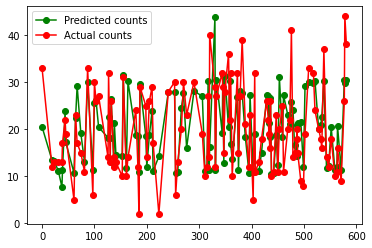

In [25]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Total']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression for Number of Drops for All Sharks

In [26]:
# create additional time variables for dropping
drops_concat['Date'] = pd.to_datetime(drops_concat['Date'])
drops_concat['Day_of_week'] = pd.to_datetime(drops_concat['Date']).dt.dayofweek
drops_concat['Month'] = pd.to_datetime(drops_concat['Date']).dt.month
drops_concat['Day'] = pd.to_datetime(drops_concat['Date']).dt.day
drops_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GroupFeed,Varied_Target,All_GR,All_BT,All_SS,male,female,Day_of_week,Month,Day
0,2017-12-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,2.0,1.0,0.0,0.0,3.0,1,12,5
1,2017-12-07,0.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,...,1,0,2.0,7.0,1.0,4.0,6.0,3,12,7
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0,0,1.0,NaN,NaN,0.0,1.0,5,12,9
3,2017-12-10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,...,0,0,NaN,1.0,0.0,1.0,0.0,6,12,10
4,2017-12-12,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1,0,1.0,2.0,0.0,0.0,3.0,1,12,12


In [27]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concat)) < 0.8
drops_train = drops_concat[mask]
drops_test = drops_concat[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=466
Testing data set length=116


In [28]:
# setup Poisson regression expression
expr = """Total ~ Herring + Blue_Runner + Temperature + GroupFeed + 
    Mackerel + covid + Bluefish + Sardine + Varied_Target + Day + 
    Saury + Month + Mahi"""

In [29]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [30]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  466
Model:                            GLM   Df Residuals:                      452
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1043.4
Date:                Wed, 09 Dec 2020   Deviance:                       891.21
Time:                        11:58:28   Pearson chi2:                     990.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.6565      1.425      6.074

In [31]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    5.538509  0.527852       4.594819       6.676015
19   3.295865  0.279629       2.790947       3.892130
23   3.554361  0.288195       3.032105       4.166571
31   4.042816  0.363204       3.390101       4.821202
38   1.332273  0.140881       1.082886       1.639093
..        ...       ...            ...            ...
564  2.513385  0.205230       2.141678       2.949604
571  1.106042  0.104783       0.918610       1.331717
577  3.502736  0.203684       3.125431       3.925588
578  4.633924  0.276733       4.122076       5.209329
581  3.694347  0.243754       3.246199       4.204363

[116 rows x 4 columns]


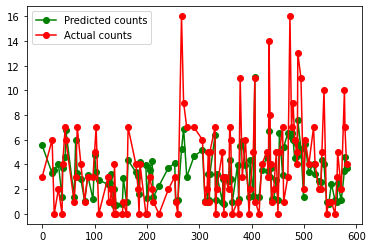

In [32]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Total']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression for Number of Targets for All Sharks

In [33]:
# create additional time variables for Targeting
targets_concat['Date'] = pd.to_datetime(targets_concat['Date'])
targets_concat['Day_of_week'] = pd.to_datetime(targets_concat['Date']).dt.dayofweek
targets_concat['Month'] = pd.to_datetime(targets_concat['Date']).dt.month
targets_concat['Day'] = pd.to_datetime(targets_concat['Date']).dt.day
targets_concat.head()

,Date,Ross,Chandler,BT1,BT2,BT3,BT4,BT5,GR1,GR2,...,GroupFeed,Varied_Target,All_GR,All_BT,All_SS,male,female,Day_of_week,Month,Day
0,2017-12-05,3.0,0.0,4.0,3.0,0.0,2.0,2.0,1.0,1.0,...,1,0,8.0,11.0,3.0,10.0,12.0,1,12,5
1,2017-12-07,4.0,5.0,2.0,2.0,5.0,3.0,5.0,0.0,0.0,...,1,0,4.0,17.0,9.0,16.0,14.0,3,12,7
2,2017-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,...,0,0,8.0,NaN,NaN,1.0,7.0,5,12,9
3,2017-12-10,4.0,7.0,0.0,2.0,2.0,0.0,0.0,NaN,NaN,...,0,0,NaN,4.0,11.0,11.0,4.0,6,12,10
4,2017-12-12,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,...,1,0,11.0,11.0,4.0,9.0,17.0,1,12,12


In [34]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concat)) < 0.8
targets_train = targets_concat[mask]
targets_test = targets_concat[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=466
Testing data set length=116


In [35]:
# setup Poisson regression expression
expr = """Total ~ GroupFeed + Sardine + light_training + 
    Day_of_week + Saury + Salmon + Blue_Runner + Humbolt_Squid + 
    Mackerel + covid + Garlic + Squid + Day + Bluefish + Mahi + 
    Bonito + Temperature"""

In [36]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [37]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                  466
Model:                            GLM   Df Residuals:                      448
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3538.2
Date:                Wed, 09 Dec 2020   Deviance:                       4438.6
Time:                        11:58:30   Pearson chi2:                 4.48e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4029      0.338      7.

In [38]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    43.495925  1.325351      40.974330      46.172701
19   38.445160  1.202065      36.159894      40.874852
23   38.760238  1.183698      36.508300      41.151083
31   35.927426  1.280282      33.503744      38.526439
38   16.376435  0.557377      15.319636      17.506136
..         ...       ...            ...            ...
564  63.065915  1.180657      60.793810      65.422938
571  26.389361  0.522917      25.384110      27.434422
577  70.945308  0.986723      69.037489      72.905849
578  77.414250  1.207514      75.083378      79.817482
581  71.492743  1.149321      69.275234      73.781235

[116 rows x 4 columns]


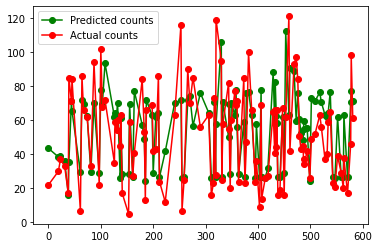

In [39]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Total']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression Across Different Species of Sharks

# Sandbar Sharks

In [40]:
expr = """All_SS ~ Sardine + Bonito + Bluefish + Garlic + 
    Herring + Squid + Salmon + light_training + Mackerel + covid"""

In [41]:
eat_concatSS = eat_concat[eat_concat['All_SS'].notna()]

In [42]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatSS)) < 0.8
eat_train = eat_concatSS[mask]
eat_test = eat_concatSS[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=357
Testing data set length=82


Eating:

In [43]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [44]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_SS   No. Observations:                  357
Model:                            GLM   Df Residuals:                      346
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -996.42
Date:                Wed, 09 Dec 2020   Deviance:                       757.22
Time:                        11:58:30   Pearson chi2:                     676.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3283      0.105     12.

In [45]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     4.750022  0.416924       3.999291       5.641677
25    4.176968  0.395414       3.469619       5.028523
31    5.497339  0.579467       4.471246       6.758908
41    5.976489  0.245990       5.513292       6.478602
50   12.048083  1.411824       9.575733      15.158766
..         ...       ...            ...            ...
573   5.976489  0.245990       5.513292       6.478602
574   5.976489  0.245990       5.513292       6.478602
577   5.976489  0.245990       5.513292       6.478602
578   5.255471  0.258526       4.772430       5.787403
581   5.976489  0.245990       5.513292       6.478602

[82 rows x 4 columns]


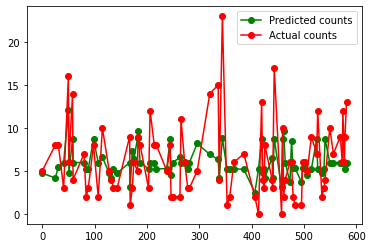

In [46]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_SS']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [47]:
drops_concatSS = drops_concat[drops_concat['All_SS'].notna()]

In [48]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatSS)) < 0.8
drops_train = drops_concatSS[mask]
drops_test = drops_concatSS[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=357
Testing data set length=81


In [49]:
expr = """All_SS ~ Varied_Target + Temperature + Saury + 
    light_training + Day + Salmon"""

In [50]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [51]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_SS   No. Observations:                  357
Model:                            GLM   Df Residuals:                      350
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -283.34
Date:                Wed, 09 Dec 2020   Deviance:                       352.98
Time:                        11:58:31   Pearson chi2:                     444.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.5530      4.605      1.

In [52]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    0.367880  0.118316       0.195860       0.690981
25   0.587549  0.161616       0.342693       1.007356
31   0.675709  0.202563       0.375480       1.215995
41   0.910892  0.222323       0.564563       1.469673
50   0.699610  0.188122       0.413021       1.185061
..        ...       ...            ...            ...
570  0.219275  0.083296       0.104146       0.461672
574  0.335168  0.045323       0.257133       0.436884
576  0.351932  0.049279       0.267467       0.463071
578  0.367097  0.059094       0.267767       0.503274
580  0.385459  0.068415       0.272206       0.545831

[81 rows x 4 columns]


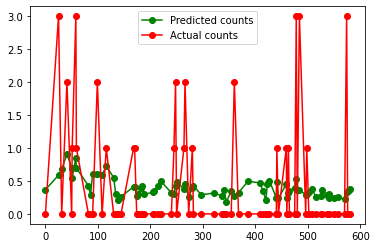

In [53]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_SS']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targets:

In [54]:
targets_concatSS = targets_concat[targets_concat['All_SS'].notna()]

In [55]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatSS)) < 0.8
targets_train = targets_concatSS[mask]
targets_test = targets_concatSS[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=356
Testing data set length=81


In [56]:
expr = """All_SS ~ Day_of_week + light_training + covid + 
    Varied_Target + Salmon + Bluefish + Goggle_Eye + Temperature + 
    Sardine + Mackerel + Humbolt_Squid + Squid + Day + Month"""

In [57]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [58]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_SS   No. Observations:                  356
Model:                            GLM   Df Residuals:                      341
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1613.2
Date:                Wed, 09 Dec 2020   Deviance:                       1593.4
Time:                        11:58:32   Pearson chi2:                 1.57e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.2971      0.663      6.

In [59]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    10.234492  0.653626       9.030344      11.599208
25   12.238834  0.759223      10.837689      13.821126
31   17.572700  1.078840      15.580476      19.819662
41   22.236339  1.061502      20.250197      24.417282
50   24.534002  1.204597      22.283078      27.012302
..         ...       ...            ...            ...
572  24.104051  0.576560      23.000094      25.260996
576  24.723478  0.603181      23.569085      25.934412
577  16.172950  0.478958      15.260935      17.139470
580  25.218046  0.731029      23.825199      26.692320
581  16.681167  0.562008      15.615233      17.819865

[81 rows x 4 columns]


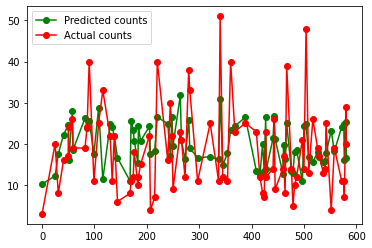

In [60]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_SS']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Blacktip Sharks

Eating:

In [61]:
expr = """All_BT ~ Varied_Target + Mackerel + Temperature + 
    Bonito + Squid + GroupFeed + Herring + Mazuri_Vitamins + 
    Garlic + Bluefish"""

In [62]:
eat_concatBT = eat_concat[eat_concat['All_BT'].notna()]

In [63]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatBT)) < 0.8
eat_train = eat_concatBT[mask]
eat_test = eat_concatBT[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=356
Testing data set length=80


In [64]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [65]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_BT   No. Observations:                  356
Model:                            GLM   Df Residuals:                      345
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1169.9
Date:                Wed, 09 Dec 2020   Deviance:                       809.45
Time:                        11:58:33   Pearson chi2:                     786.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2309      0.764     

In [66]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     9.370551  0.445080       8.537583      10.284787
27    7.423021  0.385265       6.705051       8.217870
32    9.083477  0.455277       8.233580      10.021103
43    7.578606  0.382320       6.865126       8.366237
51   10.131915  0.586749       9.044772      11.349729
..         ...       ...            ...            ...
560  12.119491  0.410188      11.341622      12.950709
573  14.830501  0.405422      14.056801      15.646786
577  14.830501  0.405422      14.056801      15.646786
578  17.218912  0.500968      16.264503      18.229327
581  14.677479  0.392838      13.927378      15.467980

[80 rows x 4 columns]


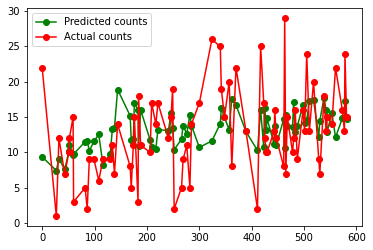

In [67]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_BT']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [68]:
drops_concatBT = drops_concat[drops_concat['All_BT'].notna()]

In [69]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatBT)) < 0.8
drops_train = drops_concatBT[mask]
drops_test = drops_concatBT[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=356
Testing data set length=80


In [70]:
expr = """All_BT ~ Temperature + covid + Garlic + Mahi + 
    Herring + Bonito + Salmon + Humbolt_Squid + Mazuri_Vitamins + 
    Saury + Sardine
"""

In [71]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [72]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_BT   No. Observations:                  356
Model:                            GLM   Df Residuals:                      344
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -757.32
Date:                Wed, 09 Dec 2020   Deviance:                       550.31
Time:                        11:58:34   Pearson chi2:                     537.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.1645      1.628     

In [73]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    3.322583  0.226677       2.906727       3.797934
25   4.456878  0.269683       3.958450       5.018066
31   4.443651  0.405144       3.716488       5.313089
41   4.549137  0.283961       4.025281       5.141167
50   4.663939  0.815335       3.310918       6.569877
..        ...       ...            ...            ...
560  2.255396  0.149864       1.979990       2.569110
573  2.598346  0.171409       2.283203       2.956987
577  2.598346  0.171409       2.283203       2.956987
578  3.485394  0.215915       3.086890       3.935343
581  2.652133  0.171176       2.336987       3.009776

[80 rows x 4 columns]


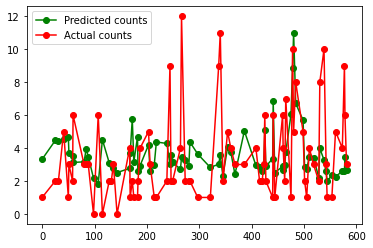

In [74]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_BT']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targeting:

In [75]:
targets_concatBT = targets_concat[targets_concat['All_BT'].notna()]

In [76]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatBT)) < 0.8
targets_train = targets_concatBT[mask]
targets_test = targets_concatBT[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=356
Testing data set length=81


In [77]:
expr = """All_BT ~ light_training + Saury + Salmon + Varied_Target + 
    Month + Mackerel + Day_of_week + Bonito + covid + Garlic + 
    Blue_Runner + Temperature + Squid + Bluefish + Herring + 
    Goggle_Eye"""

In [78]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [79]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_BT   No. Observations:                  356
Model:                            GLM   Df Residuals:                      339
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1957.6
Date:                Wed, 09 Dec 2020   Deviance:                       2002.8
Time:                        11:58:35   Pearson chi2:                 2.05e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.2994      0.481      8.

In [80]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    18.837535  0.884115      17.182013      20.652570
25   27.443564  1.231339      25.133256      29.966240
31   27.815386  1.361301      25.271254      30.615644
41   35.590985  1.600761      32.587863      38.870859
50   33.902807  2.196053      29.860641      38.492153
..         ...       ...            ...            ...
572  39.464761  0.696085      38.123772      40.852919
576  39.464761  0.696085      38.123772      40.852919
577  33.873740  0.705986      32.517914      35.286097
580  39.350153  0.702530      37.997033      40.751460
581  33.972398  0.701971      32.624047      35.376476

[81 rows x 4 columns]


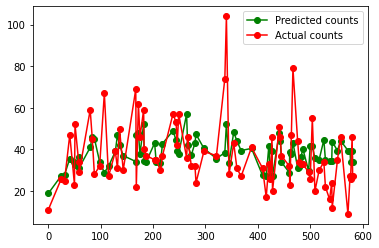

In [81]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_BT']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Gray Reef Sharks

Eating:

In [82]:
expr = """All_GR ~ Herring + Sardine + Varied_Target + Bonito + 
    covid + Bluefish + Squid + Saury + Humbolt_Squid + Blue_Runner + 
    Month + Temperature + Garlic"""

In [83]:
eat_concatGR = eat_concat[eat_concat['All_GR'].notna()]

In [84]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatGR)) < 0.8
eat_train = eat_concatGR[mask]
eat_test = eat_concatGR[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=356
Testing data set length=81


In [85]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [86]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_GR   No. Observations:                  356
Model:                            GLM   Df Residuals:                      342
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -938.83
Date:                Wed, 09 Dec 2020   Deviance:                       572.66
Time:                        11:58:35   Pearson chi2:                     511.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4478      0.997     -0.449

In [87]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     6.548702  0.498222       5.641521       7.601761
25    4.836106  0.344929       4.205184       5.561688
30    8.140757  0.517138       7.187743       9.220129
41    3.917866  0.344330       3.297919       4.654352
50    3.812936  0.642971       2.739822       5.306361
..         ...       ...            ...            ...
571  11.949620  0.425096      11.144829      12.812527
575  11.949620  0.425096      11.144829      12.812527
577   8.912555  0.342749       8.265471       9.610296
579  12.002685  0.427396      11.193568      12.870288
581   8.873152  0.336997       8.236635       9.558857

[81 rows x 4 columns]


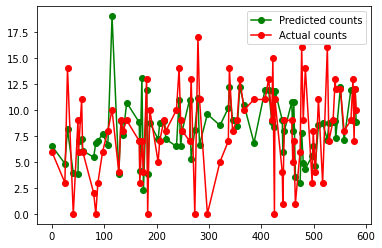

In [88]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_GR']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [89]:
drops_concatGR = drops_concat[drops_concat['All_GR'].notna()]

In [90]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatGR)) < 0.8
drops_train = drops_concatGR[mask]
drops_test = drops_concatGR[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=357
Testing data set length=81


In [91]:
expr = """All_GR ~ Temperature + Blue_Runner + light_training + 
    Month + Humbolt_Squid + Mazuri_Vitamins + Varied_Target + 
    Sardine + Squid"""

In [92]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [93]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_GR   No. Observations:                  357
Model:                            GLM   Df Residuals:                      347
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -473.59
Date:                Wed, 09 Dec 2020   Deviance:                       510.75
Time:                        11:58:36   Pearson chi2:                     521.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6787      3.158     

In [94]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    1.697266  0.314781       1.180002       2.441277
25   1.603350  0.319010       1.085598       2.368031
30   1.393246  0.268771       0.954602       2.033448
41   0.545080  0.174576       0.290965       1.021127
50   0.143980  0.075035       0.051844       0.399858
..        ...       ...            ...            ...
570  1.153198  0.128197       0.927426       1.433933
574  1.355641  0.259241       0.931898       1.972063
575  1.031741  0.098104       0.856315       1.243104
578  1.072103  0.129928       0.845434       1.359544
579  1.016803  0.097629       0.842380       1.227343

[81 rows x 4 columns]


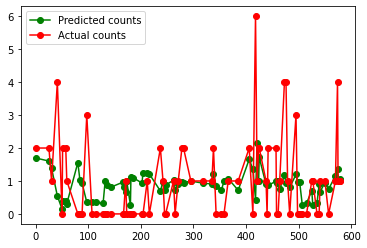

In [95]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_GR']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targeting:

In [96]:
targets_concatGR = targets_concat[targets_concat['All_GR'].notna()]

In [97]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatGR)) < 0.8
targets_train = targets_concatGR[mask]
targets_test = targets_concatGR[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=356
Testing data set length=81


In [98]:
expr = """All_GR ~ Herring + Sardine + light_training + Day_of_week + 
    Temperature + Month + Goggle_Eye + Humbolt_Squid + Garlic + 
    Mahi + Blue_Runner + Saury + Bluefish + GroupFeed + Squid + 
    covid + Bonito"""

In [99]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [100]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 All_GR   No. Observations:                  356
Model:                            GLM   Df Residuals:                      338
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1526.7
Date:                Wed, 09 Dec 2020   Deviance:                       1470.0
Time:                        11:58:37   Pearson chi2:                 1.43e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.4025      0.705     -0.

In [101]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    13.234003  0.821038      11.718788      14.945133
25    9.289435  0.592405       8.197973      10.526211
30   15.911870  0.971110      14.117960      17.933726
41   10.550698  0.567757       9.494587      11.724283
50   11.943060  1.865284       8.793742      16.220248
..         ...       ...            ...            ...
571  25.232767  0.615144      24.055457      26.467696
575  25.232767  0.615144      24.055457      26.467696
577  17.941681  0.474588      17.035206      18.896391
579  25.418439  0.618176      24.235259      26.659382
581  17.810624  0.467408      16.917682      18.750696

[81 rows x 4 columns]


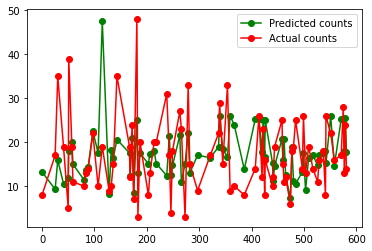

In [102]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['All_GR']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Poisson Regression for Each Gender of Shark

# Male

Eating:

In [103]:
expr = """male ~ Herring + Garlic + GroupFeed + Sardine + 
    Mackerel + light_training + Mahi + covid + Mazuri_Vitamins + 
    Salmon + Saury + Blue_Runner + Month + Bonito + Day_of_week + 
    Day"""

In [104]:
eat_concatM = eat_concat[eat_concat['male'].notna()]

In [105]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatM)) < 0.8
eat_train = eat_concatM[mask]
eat_test = eat_concatM[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=466
Testing data set length=116


In [106]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [107]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                  466
Model:                            GLM   Df Residuals:                      449
Model Family:                 Poisson   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.0
Date:                Wed, 09 Dec 2020   Deviance:                       1124.5
Time:                        11:58:38   Pearson chi2:                 1.06e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1398      0.172     

In [108]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0     9.390027  0.700605       8.112549      10.868669
19    7.339538  0.558659       6.322347       8.520383
23    7.538085  0.563427       6.510867       8.727367
31    5.977273  0.523745       5.034061       7.097210
38    1.504412  0.137875       1.257062       1.800432
..         ...       ...            ...            ...
564  12.642154  0.484644      11.727078      13.628635
571   2.391896  0.154337       2.107748       2.714350
577  14.573516  0.505572      13.615550      15.598883
578  14.553503  0.528624      13.553440      15.627358
581  14.967754  0.598153      13.840132      16.187248

[116 rows x 4 columns]


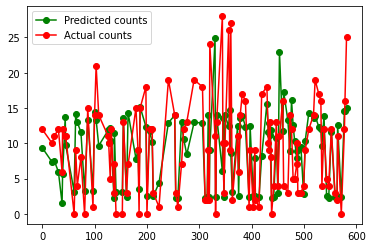

In [109]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['male']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [110]:
drops_concatM = drops_concat[drops_concat['male'].notna()]

In [111]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatM)) < 0.8
drops_train = drops_concatM[mask]
drops_test = drops_concatM[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=466
Testing data set length=116


In [112]:
expr = """male ~ Herring + GroupFeed + Varied_Target + Temperature + 
    Sardine + Blue_Runner + covid + Saury + Mackerel + Salmon + 
    Month"""

In [113]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [114]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                  466
Model:                            GLM   Df Residuals:                      454
Model Family:                 Poisson   Df Model:                           11
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -701.46
Date:                Wed, 09 Dec 2020   Deviance:                       654.39
Time:                        11:58:39   Pearson chi2:                     686.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.1195      2.148      3.314

In [115]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    3.543175  0.467131       2.736342       4.587909
19   1.943201  0.230446       1.540185       2.451674
23   2.021766  0.239608       1.602698       2.550411
31   2.145610  0.258472       1.694378       2.717009
38   0.449577  0.083367       0.312580       0.646615
..        ...       ...            ...            ...
564  0.987877  0.106392       0.799891       1.220043
571  0.267819  0.047598       0.189044       0.379419
577  1.548252  0.138693       1.298945       1.845408
578  1.830831  0.153854       1.552808       2.158633
581  1.579240  0.139288       1.328534       1.877258

[116 rows x 4 columns]


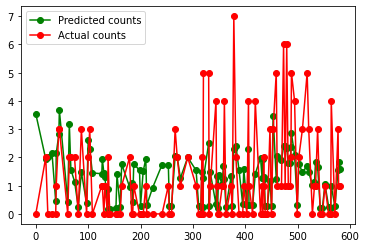

In [116]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['male']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Targeting:

In [117]:
targets_concatM = targets_concat[targets_concat['male'].notna()]

In [118]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatM)) < 0.8
targets_train = targets_concatM[mask]
targets_test = targets_concatM[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=466
Testing data set length=116


In [119]:
expr = """male ~ Herring + Garlic + light_training + Sardine + 
    GroupFeed + Mackerel + Day_of_week + Saury + Blue_Runner + 
    Varied_Target + Salmon + covid + Humbolt_Squid + Temperature + 
    Day + Goggle_Eye + Bonito + Squid"""

In [120]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [121]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                  466
Model:                            GLM   Df Residuals:                      447
Model Family:                 Poisson   Df Model:                           18
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.6
Date:                Wed, 09 Dec 2020   Deviance:                       3692.9
Time:                        11:58:40   Pearson chi2:                 3.95e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2221      0.481      4.

In [122]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    21.144932  0.919380      19.417626      23.025891
19   22.909612  1.008757      21.015397      24.974561
23   23.431619  1.007612      21.537671      25.492114
31   20.293575  1.023039      18.384331      22.401097
38    3.784043  0.210441       3.393271       4.219818
..         ...       ...            ...            ...
564  38.148591  0.993078      36.251014      40.145496
571   6.180719  0.243422       5.721571       6.676714
577  34.861577  0.710404      33.496650      36.282123
578  39.952311  0.856853      38.307718      41.667508
581  35.533118  0.826424      33.949720      37.190365

[116 rows x 4 columns]


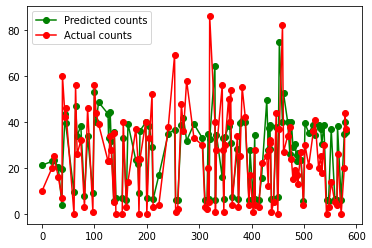

In [123]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['male']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

# Female

Eating:

In [124]:
expr = """female ~ GroupFeed + Varied_Target + Temperature + 
    Saury + Squid + Herring + Blue_Runner + Humbolt_Squid + Bonito + 
    covid + Day_of_week + Goggle_Eye"""

In [125]:
eat_concatF = eat_concat[eat_concat['female'].notna()]

In [126]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(eat_concatF)) < 0.8
eat_train = eat_concatF[mask]
eat_test = eat_concatF[~mask]
print('Training data set length='+str(len(eat_train)))
print('Testing data set length='+str(len(eat_test)))

Training data set length=466
Testing data set length=116


In [127]:
y_train, X_train = dmatrices(expr, eat_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, eat_test, return_type='dataframe')

In [128]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 female   No. Observations:                  466
Model:                            GLM   Df Residuals:                      453
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1426.5
Date:                Wed, 09 Dec 2020   Deviance:                       971.73
Time:                        11:58:40   Pearson chi2:                     893.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.0343      0.748     -2.719

In [129]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    10.576698  0.479720       9.677045      11.559990
19    5.324308  0.262068       4.834662       5.863544
23    5.220330  0.259609       4.735517       5.754776
31    5.068158  0.258775       4.585520       5.601595
38    6.585280  0.314605       5.996653       7.231686
..         ...       ...            ...            ...
564   8.345064  0.334046       7.715371       9.026150
571   9.538499  0.331801       8.909854      10.211499
577  16.414742  0.429497      15.594164      17.278499
578  15.485567  0.470396      14.590517      16.435523
581  16.253671  0.416608      15.457306      17.091065

[116 rows x 4 columns]


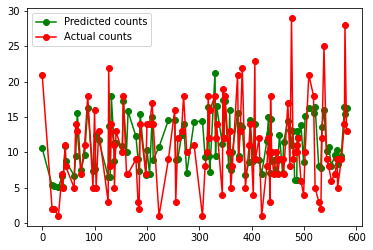

In [130]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['female']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()

Dropping:

In [131]:
drops_concatF = drops_concat[drops_concat['female'].notna()]

In [132]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(drops_concatF)) < 0.8
drops_train = drops_concatF[mask]
drops_test = drops_concatF[~mask]
print('Training data set length='+str(len(drops_train)))
print('Testing data set length='+str(len(drops_test)))

Training data set length=466
Testing data set length=116


In [133]:
expr = """female ~ GroupFeed + Mackerel + Blue_Runner + Temperature + 
    covid + Bluefish + Squid + Mahi"""

In [134]:
y_train, X_train = dmatrices(expr, drops_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, drops_test, return_type='dataframe')

In [135]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 female   No. Observations:                  466
Model:                            GLM   Df Residuals:                      457
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -849.92
Date:                Wed, 09 Dec 2020   Deviance:                       760.89
Time:                        11:58:41   Pearson chi2:                     861.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2206      1.859      4.421      

In [136]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0    2.441858  0.168466       2.133021       2.795411
19   1.761244  0.119175       1.542492       2.011020
23   1.841461  0.126547       1.609411       2.106969
31   1.968688  0.143477       1.706640       2.270974
38   1.003178  0.091103       0.839608       1.198613
..        ...       ...            ...            ...
564  1.318531  0.121485       1.100687       1.579491
571  0.897471  0.080236       0.753218       1.069351
577  1.869230  0.122605       1.643734       2.125660
578  2.481618  0.174858       2.161514       2.849126
581  1.911323  0.121890       1.686751       2.165795

[116 rows x 4 columns]


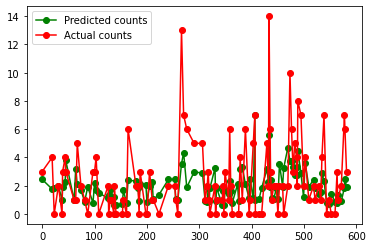

In [137]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['female']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()


Targeting:

In [138]:
targets_concatF = targets_concat[targets_concat['female'].notna()]

In [139]:
# Create training and testing datasets
np.random.seed(25)
mask = np.random.rand(len(targets_concatF)) < 0.8
targets_train = targets_concatF[mask]
targets_test = targets_concatF[~mask]
print('Training data set length='+str(len(targets_train)))
print('Testing data set length='+str(len(targets_test)))

Training data set length=466
Testing data set length=116


In [140]:
expr = """female ~ GroupFeed + light_training + Day_of_week + 
    Saury + Varied_Target + Salmon + Humbolt_Squid + Bluefish + 
    Squid + Sardine + Herring + Blue_Runner + Mahi + Day + Temperature + 
    Bonito + Goggle_Eye"""

In [141]:
y_train, X_train = dmatrices(expr, targets_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, targets_test, return_type='dataframe')

In [142]:
# Fit model and print results of model
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 female   No. Observations:                  466
Model:                            GLM   Df Residuals:                      448
Model Family:                 Poisson   Df Model:                           17
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2287.2
Date:                Wed, 09 Dec 2020   Deviance:                       2242.2
Time:                        11:58:42   Pearson chi2:                 2.25e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1052      0.486      2.

In [143]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
 
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
0    22.167609  0.947038      20.387035      24.103696
19   15.220050  0.679624      13.944636      16.612117
23   15.174395  0.661768      13.931240      16.528483
31   15.119716  0.686620      13.832117      16.527175
38   13.392096  0.596091      12.273289      14.612890
..         ...       ...            ...            ...
564  24.583463  0.688217      23.270921      25.970037
571  21.106042  0.497935      20.152327      22.104893
577  35.664560  0.708497      34.302618      37.080577
578  37.057102  0.827534      35.470148      38.715057
581  35.642964  0.815659      34.079624      37.278020

[116 rows x 4 columns]


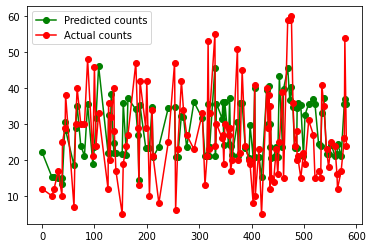

In [144]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['female']
 
fig = plt.figure()

 
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
 
plt.legend(handles=[predicted, actual])
 
plt.show()